In [1]:
import pandas as pd;


In [2]:
# Load the dataset
file_path = "C:\\Users\\Lenovo\\Downloads\\Amazon Sale Report.csv"
sales_data = pd.read_csv(file_path)

In [3]:
# Display basic info
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   order id            128976 non-null  object 
 2   date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   fulfilment          128976 non-null  object 
 5   sales channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   category            128976 non-null  object 
 8   size                128976 non-null  object 
 9   courier status      128976 non-null  object 
 10  qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [4]:
# Convert 'date' column to datetime
sales_data['date'] = pd.to_datetime(sales_data['date'], errors='coerce')


In [5]:
# Filter for shipped/delivered orders only
successful_orders = sales_data[sales_data['Status'].str.contains("Shipped", na=False)]

In [9]:
import matplotlib.pyplot as plt;

In [10]:
# Aggregate sales amount and quantity by date
daily_sales = successful_orders.groupby('date').agg({'amount': 'sum', 'qty': 'sum'}).reset_index()

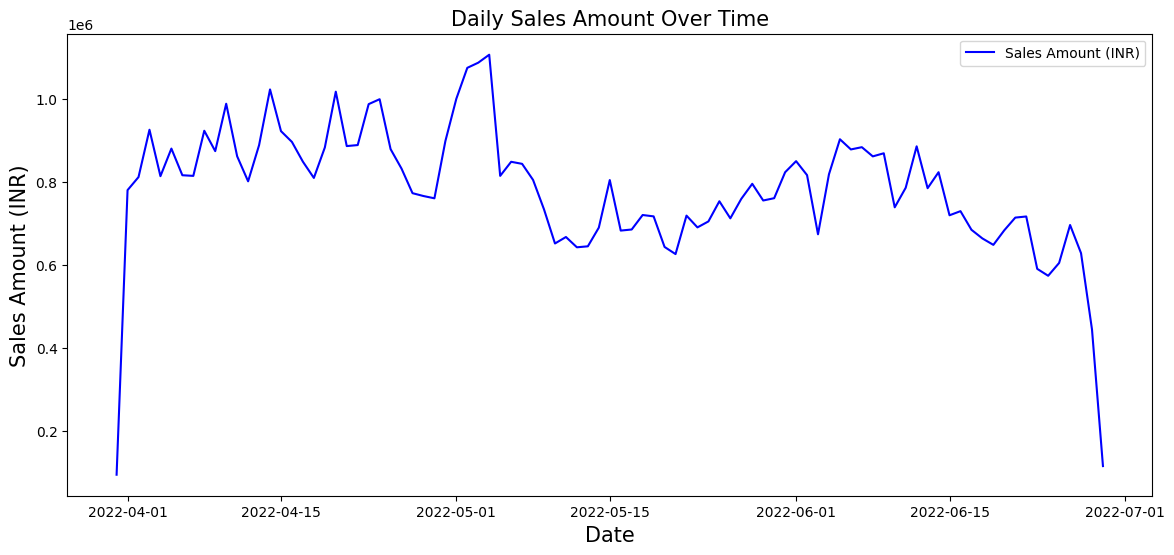

In [11]:
# Plot daily sales amount
plt.figure(figsize=(14, 6))
plt.plot(daily_sales['date'], daily_sales['amount'], label='Sales Amount (INR)', color='blue')
plt.title('Daily Sales Amount Over Time',fontsize=15 )
plt.xlabel('Date',fontsize=15)
plt.ylabel('Sales Amount (INR)',fontsize=15)
plt.legend()
plt.show()

In [12]:
# Group by category and size
category_sales = successful_orders.groupby(['category', 'size']).agg({'qty': 'sum', 'amount': 'sum'}).reset_index()

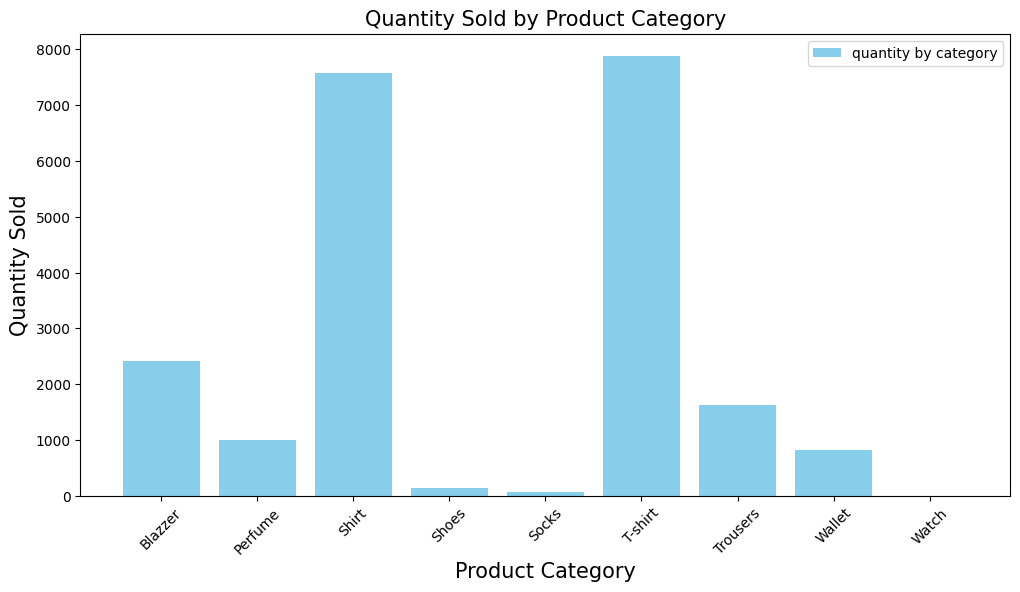

In [13]:
# Bar plot for quantity by category
plt.figure(figsize=(12, 6))
plt.bar(category_sales['category'], category_sales['qty'], color='skyblue',label='quantity by category')
plt.title('Quantity Sold by Product Category', fontsize=15)
plt.xlabel('Product Category',fontsize=15)
plt.ylabel('Quantity Sold',fontsize=15)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [14]:
# Count by fulfillment type
fulfillment_counts = successful_orders['fulfilment'].value_counts()

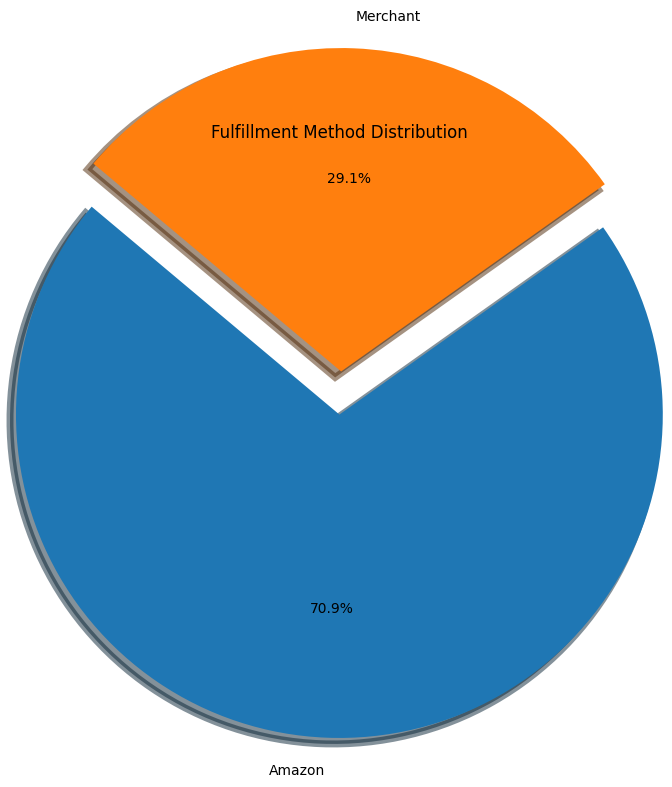

In [15]:
# Pie chart for fulfillment methods
plt.figure(figsize=(7, 7))
ex=[0.0,0.2]
plt.pie(fulfillment_counts, labels=fulfillment_counts.index, autopct='%0.1f%%', startangle=140,explode=ex,shadow=True,radius=1.5,wedgeprops={"linewidth":5})
plt.title('Fulfillment Method Distribution')
plt.show()

In [16]:
# Group by ship-city and ship-state
city_sales = successful_orders.groupby('ship-city').agg({'amount': 'sum'}).sort_values(by='amount', ascending=False).head(10)

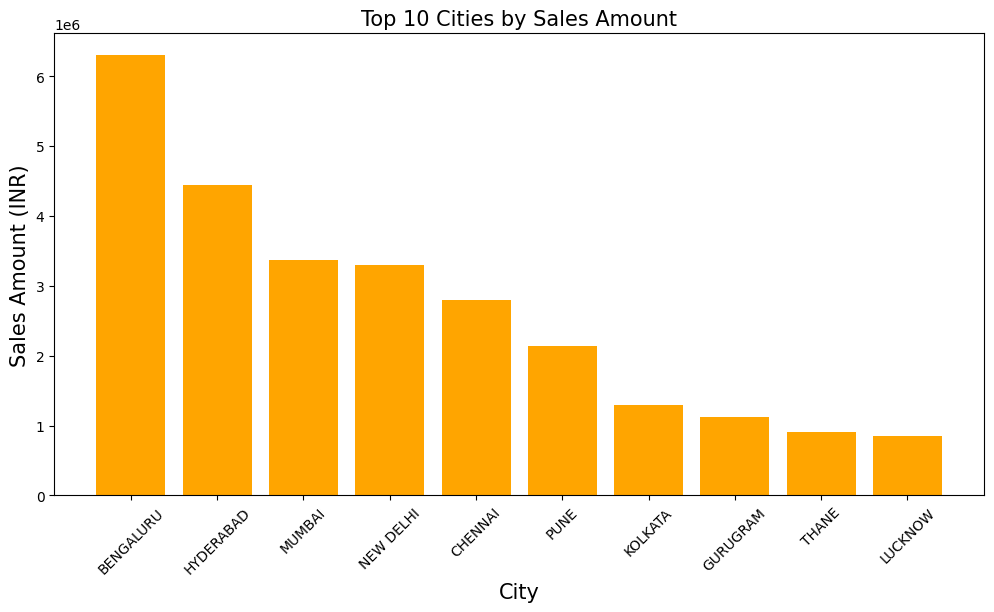

In [17]:
# Plot top cities by sales
plt.figure(figsize=(12, 6))
plt.bar(city_sales.index, city_sales['amount'], color='orange')
plt.title('Top 10 Cities by Sales Amount',fontsize=15)
plt.xlabel('City',fontsize=15)
plt.ylabel('Sales Amount (INR)',fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [18]:
# Aggregate data to create a customer profile
customer_profile = successful_orders.groupby('ship-postal-code').agg({
    'amount': 'sum',                   
    'order id': 'count',                 
    'category': lambda x: x.mode()[0],   # Most frequently purchased category
    'ship-state': 'first',               
}).reset_index()

In [19]:
# Rename columns for clarity
customer_profile.rename(columns={'order id': 'order_count', 'amount': 'total_spent'}, inplace=True)


In [20]:
# Define thresholds for spending and frequency segments
high_spending_threshold = customer_profile['total_spent'].quantile(0.75)  # Top 25% spenders
frequent_buyer_threshold = customer_profile['order_count'].quantile(0.75)  # Top 25% in frequency

In [21]:
# Segment customers based on thresholds
customer_profile['spending_segment'] = customer_profile['total_spent'].apply(
    lambda x: 'High Spender' if x >= high_spending_threshold else 'Low Spender'
)

In [22]:
customer_profile['frequency_segment'] = customer_profile['order_count'].apply(
    lambda x: 'Frequent Buyer' if x >= frequent_buyer_threshold else 'Occasional Buyer'
)

In [23]:
# Group by spending and frequency segments to find popular categories within each segment
category_segments = customer_profile.groupby(['spending_segment', 'frequency_segment', 'category']).size().unstack().fillna(0)

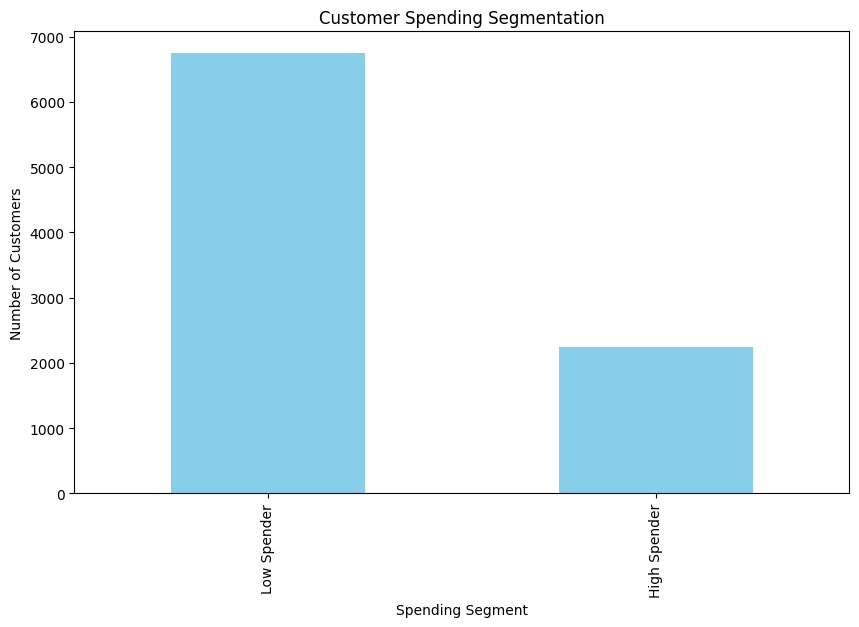

In [24]:
# Plotting spending segment distribution
plt.figure(figsize=(10, 6))
customer_profile['spending_segment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Customer Spending Segmentation')
plt.xlabel('Spending Segment')
plt.ylabel('Number of Customers')
plt.show()

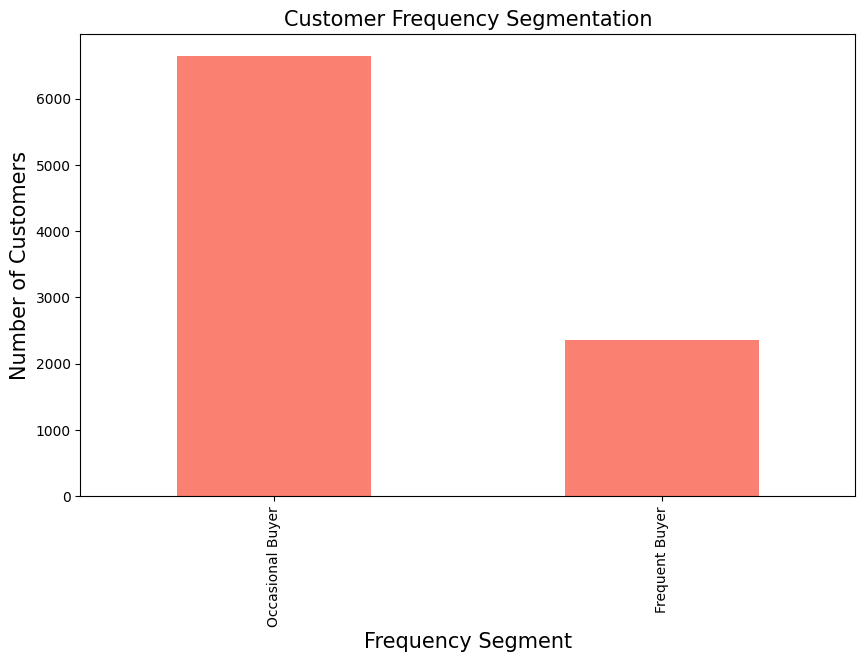

In [25]:
# Plotting frequency segment distribution
plt.figure(figsize=(10, 6))
customer_profile['frequency_segment'].value_counts().plot(kind='bar', color='salmon')
plt.title('Customer Frequency Segmentation',fontsize=15)
plt.xlabel('Frequency Segment',fontsize=15)
plt.ylabel('Number of Customers',fontsize=15)
plt.show()   